# Tutorial Part-of-Speech tagging  Con Deep Learning

### En este tutorial, veremos cómo puede usar un modelo simple en Keras, para entrenar y evaluar una red neuronal artificial para problemas de clasificación de múltiples clases.

## PARTE 1  -  Pre-Procesamiento

In [1]:
# Asegurar reproducibilidad

import numpy as np

CUSTOM_SEED = 42
np.random.seed(CUSTOM_SEED)

### Descargamos el Corpus Ancora - Cess_esp del nltk

In [2]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /home/deep-
[nltk_data]     learning/miniconda3/envs/tensorflow/lib/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

### Extraemos las oraciones tageadas del Corpus

In [3]:
import random
from nltk.corpus import cess_esp

tagged_sentences = cess_esp.tagged_sents()
#print('a random sentence: \n-> {}'.format(random.choice(sentences)))

### Extraemos los datos de la cantidad de oraciones a ser usadas y un ejemplo de una oracion presente en el corpus

In [4]:
print(tagged_sentences[0])
print("Tagged sentences: ", len(tagged_sentences))
print("Tagged words:", len(cess_esp.tagged_words()))

[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]
Tagged sentences:  6030
Tagged words: 192685


### Se procede a Dividir en una lista de Oraciones dividida en lista de palabras y cada palabra con un correspondiente tag en un alista diferente

In [5]:
import numpy as np
 
sentences, tagss =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(np.array(sentence))
    tagss.append(np.array(tags))


### Imprimimos una posicion de la lista como ejemplo

In [6]:
print(sentences[5])
print(tagss[5])

['EDF' 'tiene' 'previsto' 'invertir' '194' 'millones' 'de' 'euros' '-Fpa-'
 '186' 'millones' 'de' 'dólares' '-Fpt-' 'en' 'la' 'central' 'de'
 'Río_Bravo' ',' 'con' 'una' 'potencia' 'de' '495' 'megavatios' ',' 'y'
 '134' 'millones' 'de' 'euros' '-Fpa-' '28' 'millones' 'de' 'dólares'
 '-Fpt-' 'en' 'Saltillo' ',' 'que' 'como' 'la' 'primera' 'funcionará'
 'con' 'gas' 'natural' 'y' 'cuya' 'potencia' 'prevista' 'es' 'de' '247'
 'megavatios' '.']
['np00000' 'vmip3s0' 'aq0msp' 'vmn0000' 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpa'
 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpt' 'sps00' 'da0fs0' 'ncfs000' 'sps00'
 'np00000' 'Fc' 'sps00' 'di0fs0' 'ncfs000' 'sps00' 'Z' 'ncmp000' 'Fc' 'cc'
 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpa' 'Z' 'ncmp000' 'sps00' 'Zm' 'Fpt' 'sps00'
 'np00000' 'Fc' 'pr0cn000' 'cs' 'da0fs0' 'ao0fs0' 'vmif3s0' 'sps00'
 'ncms000' 'aq0cs0' 'cc' 'pr0fs000' 'ncfs000' 'aq0fsp' 'vsip3s0' 'sps00'
 'Z' 'ncmp000' 'Fp']


### Dividimos el corpus de la siguiente manera, Utilizamos aproximadamente el 60% de las oraciones etiquetadas para el entrenamiento, el 20% como conjunto de validación y el 20% para evaluar nuestro modelo.

In [7]:
from sklearn.model_selection import train_test_split
 
(training_sentences, 
 test_sentences, 
 training_tags, 
 test_tags) = train_test_split(sentences, tagss, test_size=0.2)

(train_sentences, 
 eval_sentences, 
 train_tags, 
 eval_tags) = train_test_split(training_sentences, training_tags, test_size=0.25)

### Imprimimos los tamaños de las listas que nos indicaran el tamaño de filas de las matrices con las que estaremos trabajando

In [8]:
print("training_sentences:" + str(len(training_sentences)))
print("train_sentences: " + str(len(train_sentences)))
print("test_sentences: " + str(len(test_sentences)))
print("eval_sentences: " + str(len(eval_sentences)) + "\n")

print(train_sentences[0])
print(test_sentences[0])
print(eval_sentences[0])

print("\ntraining_tags:" + str(len(training_sentences)))
print("train_tags: " + str(len(train_tags)))
print("test_tags: " + str(len(test_tags)))
print("eval_tags: " + str(len(eval_tags)) + "\n")

print(train_tags[0])
print(test_tags[0])
print(eval_tags[0])

training_sentences:4824
train_sentences: 3618
test_sentences: 1206
eval_sentences: 1206

['*' 'El' 'Madrid' 'precisa' 'que' 'el' 'Deportivo' 'gane' 'la' 'Liga' ','
 'porque' 'los' 'gallegos' 'no' 'son' 'considerados' 'unos' 'herederos'
 ',' 'sino' 'unos' 'entrometidos' 'que' 'se' 'supone' 'temporales' ','
 'que' 'pertenecen' 'a' 'la' 'actualidad' 'más' 'rabiosa' 'y' 'no' 'a'
 'la' 'historia' 'más' 'enrabietada' '.']
['El' 'técnico' 'barcelonista' 'ha' 'asegurado' 'que' 'la' 'visita' 'de'
 'Gaspart' 'ha' 'contribuido' 'a' '"' 'sumar' '"' ',' 'y' '*0*' 'ha'
 'argumentado' 'que' 'el' 'encuentro' 'con' 'el' 'presidente' 'significa'
 'que' 'en' 'el' 'Barcelona' '"' 'todos' 'van' 'en' 'la' 'misma'
 'dirección' '"' '.']
['Lo_suyo' ',' 'lo' 'de' 'las' 'ratas' ',' 'no' 'es' 'la' 'carroña' 'pura'
 'y' 'dura' 'sino' 'la' 'vida' 'regalada' ',' 'el' 'eterno' 'banquete'
 'de' 'sobras' 'y' 'residuos' ',' 'el' 'festín' 'organizado' 'a' 'la'
 'sobra' 'de' 'la' 'abundancia' 'y' 'el' 'hartazgo' '.']

tra

### Ahora creamos una array con todas las palabras y los tags presentes en el corpus, adicionalmente se crea un diccionario que contiene las palabras unicas y los tags unicos de tal forma que no se repitan y que contienen un indice o llave

In [9]:
words, tagsss = set([]), set([])
 
for s in (train_sentences + eval_sentences + test_sentences):
    for w in s:
        words.add(w.lower())

for ts in (train_tags + eval_tags + test_tags):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs
 
tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))

24499
291


### Ahora procedemos a transformar cada uno de los conjuntos de oraciones y tags en vectores numericos, modificando la palabra o tag en un Valor numerico que corresponde a una llave en el diccionario de palbras o tags

In [10]:
train_sentences_X, eval_sentences_X, test_sentences_X, train_tags_y, eval_tags_y, test_tags_y = [], [], [], [], [], []

for s in train_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    train_sentences_X.append(s_int)

for s in eval_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    eval_sentences_X.append(s_int)

for s in test_sentences:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
 
    test_sentences_X.append(s_int)

for s in train_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    train_tags_y.append(s_int)

for s in eval_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    eval_tags_y.append(s_int)

for s in test_tags:
    s_int = []
    for w in s:
        try:
            s_int.append(tag2index[w])
        except KeyError:
            s_int.append(tag2index['-OOV-'])
            
    test_tags_y.append(s_int)


### Se imprime la longitud de las matrices y una muesta de cada una de las matrices creadas

In [11]:
print("Longitudes de las Matrices:")
print(len(train_sentences_X))
print(len(eval_sentences_X))
print(len(test_sentences_X))
print(len(train_tags_y))
print(len(eval_tags_y))
print(len(test_tags_y))

print("\nMuestra de Datos presentes en las Matrices con las transformaciones:")

print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Longitudes de las Matrices:
3618
1206
1206
3618
1206
1206

Muestra de Datos presentes en las Matrices con las transformaciones:
[12388, 10282, 21331, 22506, 11318, 10282, 6690, 12903, 3339, 10218, 9807, 4081, 1175, 724, 10112, 10681, 1924, 17314, 3260, 9807, 21238, 17314, 7110, 11318, 11650, 19352, 18149, 9807, 11318, 6908, 1905, 3339, 10812, 14810, 15276, 12739, 10112, 1905, 3339, 21116, 14810, 17520, 12889]
[7620, 9807, 14831, 17148, 18669, 7634, 9807, 10112, 21890, 3339, 14056, 6424, 12739, 1026, 21238, 3339, 15202, 17933, 9807, 10282, 13037, 6674, 17148, 1356, 12739, 4675, 9807, 10282, 4774, 22976, 1905, 3339, 16888, 17148, 3339, 9781, 12739, 10282, 7169, 12889]
[10282, 12142, 19092, 4110, 23302, 11318, 3339, 4599, 17148, 189, 4110, 1073, 1905, 17188, 6641, 17188, 9807, 12739, 8372, 4110, 17458, 11318, 10282, 10615, 22163, 10282, 6275, 17479, 11318, 19426, 10282, 11608, 17188, 5214, 10889, 19426, 3339, 23555, 11965, 17188, 12889]
[230, 205, 251, 4, 166, 205, 214, 189, 267, 227, 133

### Se calcula cual es la oracion que mayor cantidad de Palabras contiene

In [12]:
MAX_LENGTH1 = len(max(train_sentences_X, key=len))
MAX_LENGTH2 = len(max(eval_sentences_X, key=len))
MAX_LENGTH3 = len(max(test_sentences_X, key=len))

l = [MAX_LENGTH1, MAX_LENGTH2, MAX_LENGTH3]
MAX_LENGTH = max(l)

print(MAX_LENGTH)

149


### Se procede a Normalizar las matrices para que todas contengan el mismo numero de columans, con la longitud maxima de palabras encontradas anteriormente, esto se logra agregando ceros a la derecha en las posiciones que hacen falta en el vector

In [13]:
from keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
eval_sentences_X = pad_sequences(eval_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = pad_sequences(train_tags_y, maxlen=MAX_LENGTH, padding='post')
eval_tags_y = pad_sequences(eval_tags_y, maxlen=MAX_LENGTH, padding='post')
test_tags_y = pad_sequences(test_tags_y, maxlen=MAX_LENGTH, padding='post')
 
print(train_sentences_X[0])
print(eval_sentences_X[0])
print(test_sentences_X[0])
print(train_tags_y[0])
print(eval_tags_y[0])
print(test_tags_y[0])

Using TensorFlow backend.


[12388 10282 21331 22506 11318 10282  6690 12903  3339 10218  9807  4081
  1175   724 10112 10681  1924 17314  3260  9807 21238 17314  7110 11318
 11650 19352 18149  9807 11318  6908  1905  3339 10812 14810 15276 12739
 10112  1905  3339 21116 14810 17520 12889     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
[ 7620  9807 14831 17148 18669  7634  9807 10112 21890  3339 14056  6424
 12739  1026 21238 

### Definimos la funcion con la cual categorizaremos los tags y los covertiremos un vector One-hot

In [14]:
def to_categorical(sequences, categories):
    cat_sequences = []
    for s in sequences:
        cats = []
        for item in s:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

### Desarrollamos una prueba de la categorisacion de los tags

In [15]:
cat_train_tags_y = to_categorical(train_tags_y, len(tag2index))
print(cat_train_tags_y[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## PARTE 2  -  Entrenamiento

### Definimos el Modelo Base con el cual se procedera a desarrollar la fase de Entrenamiento

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
from keras.utils import multi_gpu_model

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))

parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
 
model.summary()
parallel_model.summary()

plot_model(model, to_file='../Plot/model-mb00.png', show_shapes=True)

Using TensorFlow backend.


NameError: name 'MAX_LENGTH' is not defined

### Se dedarrolla el entrenamiento del modelo

In [21]:
model_hist = parallel_model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)),
                       validation_data=(eval_sentences_X, to_categorical(eval_tags_y, len(tag2index))),
                       batch_size=128, 
                       epochs=40,
                       validation_split=0.2)

Train on 3618 samples, validate on 1206 samples
Epoch 1/40
3618/3618 [==============================] - 25s 7ms/step - loss: 2.1316 - acc: 0.7658 - val_loss: 0.9309 - val_acc: 0.8106
Epoch 2/40
3618/3618 [==============================] - 22s 6ms/step - loss: 0.8910 - acc: 0.7980 - val_loss: 0.8745 - val_acc: 0.8128
Epoch 3/40
3618/3618 [==============================] - 22s 6ms/step - loss: 0.8527 - acc: 0.8146 - val_loss: 0.8503 - val_acc: 0.8127
Epoch 4/40
3618/3618 [==============================] - 22s 6ms/step - loss: 0.8304 - acc: 0.8145 - val_loss: 0.8329 - val_acc: 0.8129
Epoch 5/40
3618/3618 [==============================] - 22s 6ms/step - loss: 0.8099 - acc: 0.8166 - val_loss: 0.8100 - val_acc: 0.8191
Epoch 6/40
3618/3618 [==============================] - 22s 6ms/step - loss: 0.7907 - acc: 0.8210 - val_loss: 0.7879 - val_acc: 0.8196
Epoch 7/40
3618/3618 [==============================] - 22s 6ms/step - loss: 0.7665 - acc: 0.8291 - val_loss: 0.7607 - val_acc: 0.8322
Epoch 8

## PARTE 3  -  Evaluación del Modelo

### Evaluamos el modelo y calculamos el valor de precision con respecto a los datos de prueba

In [23]:
scores = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores[1] * 100}")   # acc: 97.38805993872496

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

### Definimos la funcion que nos servira para graficar el comportamiento del modelo en cada epoca del entrenamiento

In [24]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss, train_acc, train_val_loss, train_val_acc):
    """ Plot model loss and accuracy through epochs. """
    blue= '#34495E'
    green = '#2ECC71'
    orange = '#E23B13'
    # plot model loss
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
    ax1.plot(range(1, len(train_loss) + 1), train_loss, blue, linewidth=5, label='training')
    ax1.plot(range(1, len(train_val_loss) + 1), train_val_loss, green, linewidth=5, label='validation')
    ax1.set_xlabel('# epoch')
    ax1.set_ylabel('loss')
    ax1.tick_params('y')
    ax1.legend(loc='upper right', shadow=False)
    ax1.set_title('Model loss through #epochs', color=orange, fontweight='bold')
    # plot model accuracy
    ax2.plot(range(1, len(train_acc) + 1), train_acc, blue, linewidth=5, label='training')
    ax2.plot(range(1, len(train_val_acc) + 1), train_val_acc, green, linewidth=5, label='validation')
    ax2.set_xlabel('# epoch')
    ax2.set_ylabel('accuracy')
    ax2.tick_params('y')
    ax2.legend(loc='lower right', shadow=False)
    ax2.set_title('Model accuracy through #epochs', color=orange, fontweight='bold')
    
    fig.savefig('../Plot/training-mb-01.png', bbox_inches='tight')

### Procedemos a Graficar el comportamiento del Entrenamiento, tanto del conjunto de entrenamiento como el de validación con respecto a la cantidad de epocas

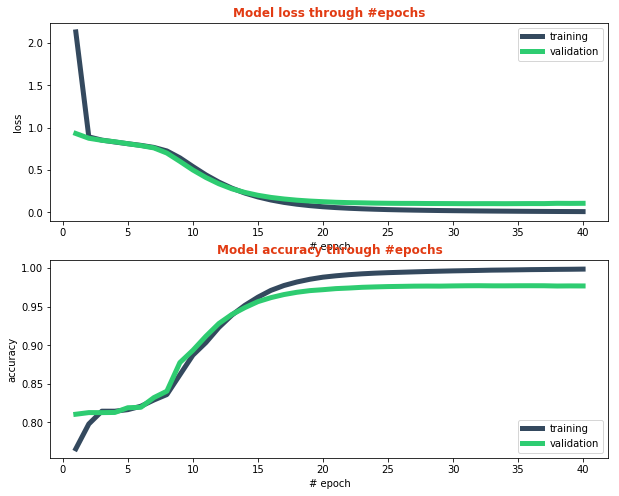

In [25]:
plot_model_performance(
    train_loss=model_hist.history.get('loss', []),
    train_acc=model_hist.history.get('acc', []),
    train_val_loss=model_hist.history.get('val_loss', []),
    train_val_acc=model_hist.history.get('val_acc', [])
)

### Función que Permite convertir Indices en Tags

In [26]:
def logits_to_tokens(sequences, index):
    token_sequences = []
    for categorical_sequence in sequences:
        token_sequence = []
        for categorical in categorical_sequence:
            token_sequence.append(index[np.argmax(categorical)])
 
        token_sequences.append(token_sequence)
 
    return token_sequences

### Hacemos la prediccion sobre el conjunto de pruebas 

In [27]:
import pandas as pd

prediction = parallel_model.predict(test_sentences_X)
log_tokens = logits_to_tokens(prediction, {i: t for t, i in tag2index.items()})

print(log_tokens[0])

['da0ms0', 'ncms000', 'aq0cs0', 'vaip3s0', 'vmp00sm', 'cs', 'da0fs0', 'ncfs000', 'sps00', 'np00000', 'vaip3s0', 'vmp00sm', 'sps00', 'Fe', 'vmn0000', 'Fe', 'Fc', 'cc', 'sn.e-SUJ', 'vaip3s0', 'vmp00sm', 'cs', 'da0ms0', 'ncms000', 'sps00', 'da0ms0', 'ncms000', 'vmip3s0', 'cs', 'sps00', 'da0ms0', 'np0000l', 'Fe', 'di0mp0', 'vmip3p0', 'sps00', 'da0fs0', 'di0fs0', 'ncfs000', 'Fe', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PA

### Hallamos los valores de F1 score, recall, precision

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

results = pd.DataFrame(columns=['Expected', 'Predicted'])
k = 0
for i, lista_etiquetas_oracion in enumerate(test_tags):
    for j, etiquetas in enumerate(lista_etiquetas_oracion):
        k = k + 1
        results.loc[k, 'Expected'] = etiquetas
        results.loc[k, 'Predicted'] = log_tokens[i][j]

# print(results)


print('\nclassification_report:\n', classification_report(results['Expected'], results['Predicted']))

/home/deep-learning/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/deep-learning/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



classification_report:
               precision    recall  f1-score   support

       -PAD-       0.00      0.00      0.00         0
         Faa       1.00      1.00      1.00         2
         Fat       1.00      0.80      0.89         5
          Fc       1.00      1.00      1.00      2291
          Fd       1.00      1.00      1.00        87
          Fe       1.00      1.00      1.00       631
          Fg       0.99      1.00      1.00       226
          Fh       0.00      0.00      0.00         3
         Fia       1.00      1.00      1.00         6
         Fit       1.00      1.00      1.00        19
          Fp       1.00      1.00      1.00      1178
         Fpa       1.00      1.00      1.00       156
         Fpt       0.99      0.99      0.99       160
          Fs       1.00      1.00      1.00        13
          Fx       0.95      1.00      0.98        41
          Fz       0.00      0.00      0.00         2
           W       0.97      0.61      0.75       194
  

## PARTE 4  -  Testing

### Creamos un pequeño Ejemplo

In [29]:
test_samples = [
    "Correr es importante para mi .".split(),
    "El hombre bajo corre bajo el puente con bajo índice de adrenalina .".split()
]
print(test_samples)

[['Correr', 'es', 'importante', 'para', 'mi', '.'], ['El', 'hombre', 'bajo', 'corre', 'bajo', 'el', 'puente', 'con', 'bajo', 'índice', 'de', 'adrenalina', '.']]


### Convertimos el texto en Una entrada para el Modelo

In [30]:
test_samples_X = []
for s in test_samples:
    s_int = []
    for w in s:
        try:
            s_int.append(word2index[w.lower()])
        except KeyError:
            s_int.append(word2index['-OOV-'])
    test_samples_X.append(s_int)

test_samples_X = pad_sequences(test_samples_X, maxlen=MAX_LENGTH, padding='post')
print(test_samples_X)

[[ 2101 21890  4288  3407  8678 12889     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [10282  7752 20760 15480 20760 10282 12735 22163 20760 13703 17148     1
  128

### Se Ejecuta la predicion con la Entrada del modelo entrenado

In [31]:
predictions = model.predict(test_samples_X)
print(predictions, predictions.shape)

[[[6.60489593e-03 2.32876864e-05 7.53883069e-05 ... 1.74496658e-04
   6.81499660e-05 1.46916613e-03]
  [1.38316478e-08 6.62090827e-09 2.64082864e-05 ... 1.58525282e-08
   1.35877553e-05 7.85295029e-08]
  [6.36615482e-07 9.62019464e-10 6.23345472e-11 ... 2.46470108e-07
   9.21214667e-12 2.30671318e-07]
  ...
  [9.99961734e-01 2.14040075e-09 8.48489545e-09 ... 3.50119848e-07
   3.13173532e-09 1.44569967e-07]
  [9.99943256e-01 6.81541712e-09 2.35762059e-08 ... 4.75925788e-07
   7.92064814e-09 1.95562407e-07]
  [9.99924183e-01 1.52773225e-08 5.10444593e-08 ... 6.08962807e-07
   1.56394044e-08 2.26320893e-07]]

 [[1.66161882e-07 4.45222170e-09 3.19109148e-07 ... 2.53024227e-05
   5.53881421e-07 2.76849689e-11]
  [1.08880636e-06 1.25175281e-09 2.07711661e-08 ... 4.40670419e-07
   7.84492471e-08 9.00594023e-06]
  [2.12770265e-05 3.00470617e-08 3.43905504e-09 ... 3.22037784e-04
   1.42620475e-08 8.57690949e-08]
  ...
  [9.99961734e-01 2.14042117e-09 8.48489545e-09 ... 3.50123202e-07
   3.13175

### Conversion de la Salida del Modelo a un lista de Indices de Tags

In [32]:
#print(len(predictions))
log_tokens = logits_to_tokens(predictions, {i: t for t, i in tag2index.items()})
print(log_tokens)

[['vmn0000', 'vsip3s0', 'aq0cs0', 'sps00', 'dp1css', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD

### Presentacion de los Resultados

In [37]:
#!pip install tabulate
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(tabulate(body2, headers=heads2))

'''
## postagging Freeling 4.1

El      hombre   bajo     corre    bajo  el      puente   con  bajo  índice   de  adrenalina  .
DA0MS0  NCMS000  AQ0MS00  VMIP3S0  SP    DA0MS0  NCMS000  SP   SP    NCMS000  SP  NCFS000     Fp


## pos tagger Stanford NLP

El      hombre   bajo     corre    bajo  el      puente   con    bajo   índice  de    adrenalina  .
da0000  nc0s000  aq0000   vmip000  sp000 da0000  nc0s000  sp000  aq0000 nc0s000 sp000 nc0s000     fp
Rub1k0n$$

'''

Correr    es       importante    para    mi      .
--------  -------  ------------  ------  ------  ---
vmn0000   vsip3s0  aq0cs0        sps00   dp1css  Fp


El      hombre    bajo    corre    bajo    el      puente    con    bajo    índice    de     adrenalina    .
------  --------  ------  -------  ------  ------  --------  -----  ------  --------  -----  ------------  ---
da0ms0  ncms000   aq0ms0  vmip3s0  sps00   da0ms0  ncms000   sps00  sps00   ncms000   sps00  np0000l       Fp


## PARTE 5  -  Mejorando la Precision y Exactitud del Modelo

### Definimos una clase que permita ignorar los Valores de Relleno

In [38]:
from keras import backend as K
 
def ignore_class_accuracy(to_ignore=0):
    def ignore_accuracy(y_true, y_pred):
        y_true_class = K.argmax(y_true, axis=-1)
        y_pred_class = K.argmax(y_pred, axis=-1)
 
        ignore_mask = K.cast(K.not_equal(y_pred_class, to_ignore), 'int32')
        matches = K.cast(K.equal(y_true_class, y_pred_class), 'int32') * ignore_mask
        accuracy = K.sum(matches) / K.maximum(K.sum(ignore_mask), 1)
        return accuracy
    return ignore_accuracy

### Definimos nuevamente nuestro modelo, agregado la clase Creada

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam
 

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001),  metrics=['accuracy', ignore_class_accuracy(0)]) 

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 149, 128)          3135872   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 149, 512)          788480    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 149, 291)          149283    
_________________________________________________________________
activation_5 (Activation)    (None, 149, 291)          0         
Total params: 4,073,635
Trainable params: 4,073,635
Non-trainable params: 0
_________________________________________________________________


### Procedemos a Entrenar Nuevamente

In [40]:
model.fit(train_sentences_X, to_categorical(train_tags_y, len(tag2index)), batch_size=128, epochs=40, validation_split=0.2)

Train on 2894 samples, validate on 724 samples
Epoch 1/40
2894/2894 [==============================] - 13s 4ms/step - loss: 2.4904 - acc: 0.7510 - ignore_accuracy: 0.0131 - val_loss: 1.0565 - val_acc: 0.7849 - val_ignore_accuracy: 0.0000e+00
Epoch 2/40
2894/2894 [==============================] - 11s 4ms/step - loss: 0.9301 - acc: 0.7871 - ignore_accuracy: 0.0645 - val_loss: 0.8984 - val_acc: 0.7863 - val_ignore_accuracy: 0.2207
Epoch 3/40
2894/2894 [==============================] - 11s 4ms/step - loss: 0.8729 - acc: 0.8085 - ignore_accuracy: 0.1650 - val_loss: 0.8709 - val_acc: 0.8131 - val_ignore_accuracy: 0.1354
Epoch 4/40
2894/2894 [==============================] - 11s 4ms/step - loss: 0.8492 - acc: 0.8149 - ignore_accuracy: 0.1361 - val_loss: 0.8525 - val_acc: 0.8130 - val_ignore_accuracy: 0.1355
Epoch 5/40
2894/2894 [==============================] - 11s 4ms/step - loss: 0.8297 - acc: 0.8149 - ignore_accuracy: 0.1361 - val_loss: 0.8345 - val_acc: 0.8130 - val_ignore_accuracy: 0

### Calculamos nuevamente la Precisión

In [41]:
scores2 = model.evaluate(test_sentences_X, to_categorical(test_tags_y, len(tag2index)))
print(f"{model.metrics_names[1]}: {scores2[1] * 100}")   # acc: 99.09751977804825

1206/1206 [==============================] - 5s 4ms/step
acc: 97.29261903422784


### Relaizamos nuevamente el calculo de F1-score, recall, y precision

### Realizamos nuevamente una prueba con el Ejemplo de Prueba

In [42]:
predictions1 = model.predict(test_samples_X)
log_tokens1  = logits_to_tokens(predictions1, {i: t for t, i in tag2index.items()})
print(log_tokens1)

[['vmn0000', 'vsip3s0', 'aq0cs0', 'sps00', 'np0000l', 'Fp', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PAD-', '-PA

### Presentamos los Resultados

In [43]:
from tabulate import tabulate

heads1 = test_samples[0]
body1 = [log_tokens[0][:len(test_samples[0])]]

heads2 = test_samples[1]
body2 = [log_tokens[1][:len(test_samples[1])]]

print(tabulate(body1, headers=heads1))

print ("\n")

print(tabulate(body2, headers=heads2))

Correr    es       importante    para    mi      .
--------  -------  ------------  ------  ------  ---
vmn0000   vsip3s0  aq0cs0        sps00   dp1css  Fp


El      hombre    bajo    corre    bajo    el      puente    con    bajo    índice    de     adrenalina    .
------  --------  ------  -------  ------  ------  --------  -----  ------  --------  -----  ------------  ---
da0ms0  ncms000   aq0ms0  vmip3s0  sps00   da0ms0  ncms000   sps00  sps00   ncms000   sps00  np0000l       Fp
